#Uvod u znanost o podacima (UZOP) - Projekt - Prvi dio

Ovaj dio projekta rješavate uz skup podataka kojeg će vam poslati asistent kod kojeg ste se prijavili. Ova vježba nosi ukupno 10 bodova. U slučaju bilo kakvih pitanja ili nejasnoća javite se nadležnom asistentu.

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. Učitajte danu CSV datoteku i prikažite prvih 8 redaka iz skupa podataka. (0,5 boda)

In [7]:
data = pd.read_csv("climate_change_impact_on_agriculture_2024.csv")
print(data.head(8))

   Entry  Year  Country            Region Crop_Type  Average_Temperature_C  \
0      1  1990   France     Ile-de-France    Coffee                  16.52   
1      2  1990   France         Grand Est  Soybeans                  15.23   
2      3  1990    India        Tamil Nadu  Soybeans                  24.43   
3      4  1990  Nigeria        North West    Barley                  -0.92   
4      5  1990   Russia      Northwestern    Coffee                  24.42   
5      6  1990  Nigeria        South West     Wheat                   8.29   
6      7  1990  Nigeria        North West    Fruits                  22.77   
7      8  1990   Canada  British Columbia      Corn                  30.65   

   Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
0                 2102.28             16.42                 2.448   
1                 1468.76              5.41                 3.120   
2                 1191.16              1.37                 1.300   
3                 108

2. Pronađite monotone i konstantne vrijednosti i uklonite ih. (1 bod)

In [8]:
constant_columns = [col for col in data.columns if data[col].nunique() <= 1]
data = data.drop(columns=constant_columns)
print("Uklonjeni konstantni stupci:", constant_columns)

Uklonjeni konstantni stupci: []


3. Pronađite nedostajuće vrijednosti. Provedite zamjenu/uklanjanje nedostajućih vrijednosti odgovarajućim postupkom. Objasnite zašto ste primjenili odabrane postupke. (2 boda)

In [13]:
missing_values = data.isnull().sum()
print("Nedostajuće vrijednosti po stupcima:\n", missing_values[missing_values > 0])

for col in data.columns:
    if data[col].isnull().any():
        if data[col].dtype == "object":
            # Zamjena s modom (najčešća vrijednost) za kategoričke
            data[col].fillna(data[col].mode()[0], inplace=True)
        else:
            # Zamjena s medijanom za numeričke
            data[col].fillna(data[col].median(), inplace=True)

Nedostajuće vrijednosti po stupcima:
 Series([], dtype: int64)


4. Transformirajte kategoričke značajke u numeričke. (1 bod)

In [14]:
data = pd.get_dummies(data, drop_first=True)

5. Za numeričke značajke prikažite srednju (mean), centralnu (median), minimalnu i maksimalnu vrijednost. Za kategoričke značajke ispišite učestalost pojavljivanja svake vrijednosti. (1,5 boda)

In [15]:

numerical_data = data.select_dtypes(include=["int64", "float64"])
categorical_data = data.select_dtypes(include=["object"])

print("Statistički podaci za numeričke značajke:\n", numerical_data.describe().loc[['mean', '50%', 'min', 'max']])
print("\nUčestalost za kategoričke značajke:")
for col in categorical_data.columns:
    print(f"\n{col}:\n{categorical_data[col].value_counts()}")

Statistički podaci za numeričke značajke:
         Entry       Year  Average_Temperature_C  Total_Precipitation_mm  \
mean   5000.5  2007.0887              15.241299             1610.106188   
50%    5000.5  2007.0000              15.175000             1607.050000   
min       1.0  1990.0000              -4.990000              200.150000   
max   10000.0  2024.0000              35.000000             2999.670000   

      CO2_Emissions_MT  Crop_Yield_MT_per_HA  Extreme_Weather_Events  \
mean         15.281589              2.240017                  4.9809   
50%          15.260000              2.170000                  5.0000   
min           0.500000              0.450000                  0.0000   
max          30.000000              5.000000                 10.0000   

      Irrigation_Access_%  Pesticide_Use_KG_per_HA  Fertilizer_Use_KG_per_HA  \
mean            55.248332                24.955735                 50.233794   
50%             55.175000                24.930000          

6. Normalizirajte numeričke značajke. (1 bod)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[numerical_data.columns] = scaler.fit_transform(numerical_data)

7. Napravite složeni graf s 4 podgrafa (2 retka i 2 stupca). Dodajte nazive podgrafova i označite osi na svakom od njih. Vizualizirajte sljedeće: (3 boda)
  - Histogram proizvoljne kategoričke značajke
  - Pitni graf ciljne varijable
  - Kutijasti graf proizvoljne numeričke varijable
  - Graf raspršenja proizvoljne 2 numeričke varijable. Obojajte uzorke s obzirom na vrijednost ciljne varijable.

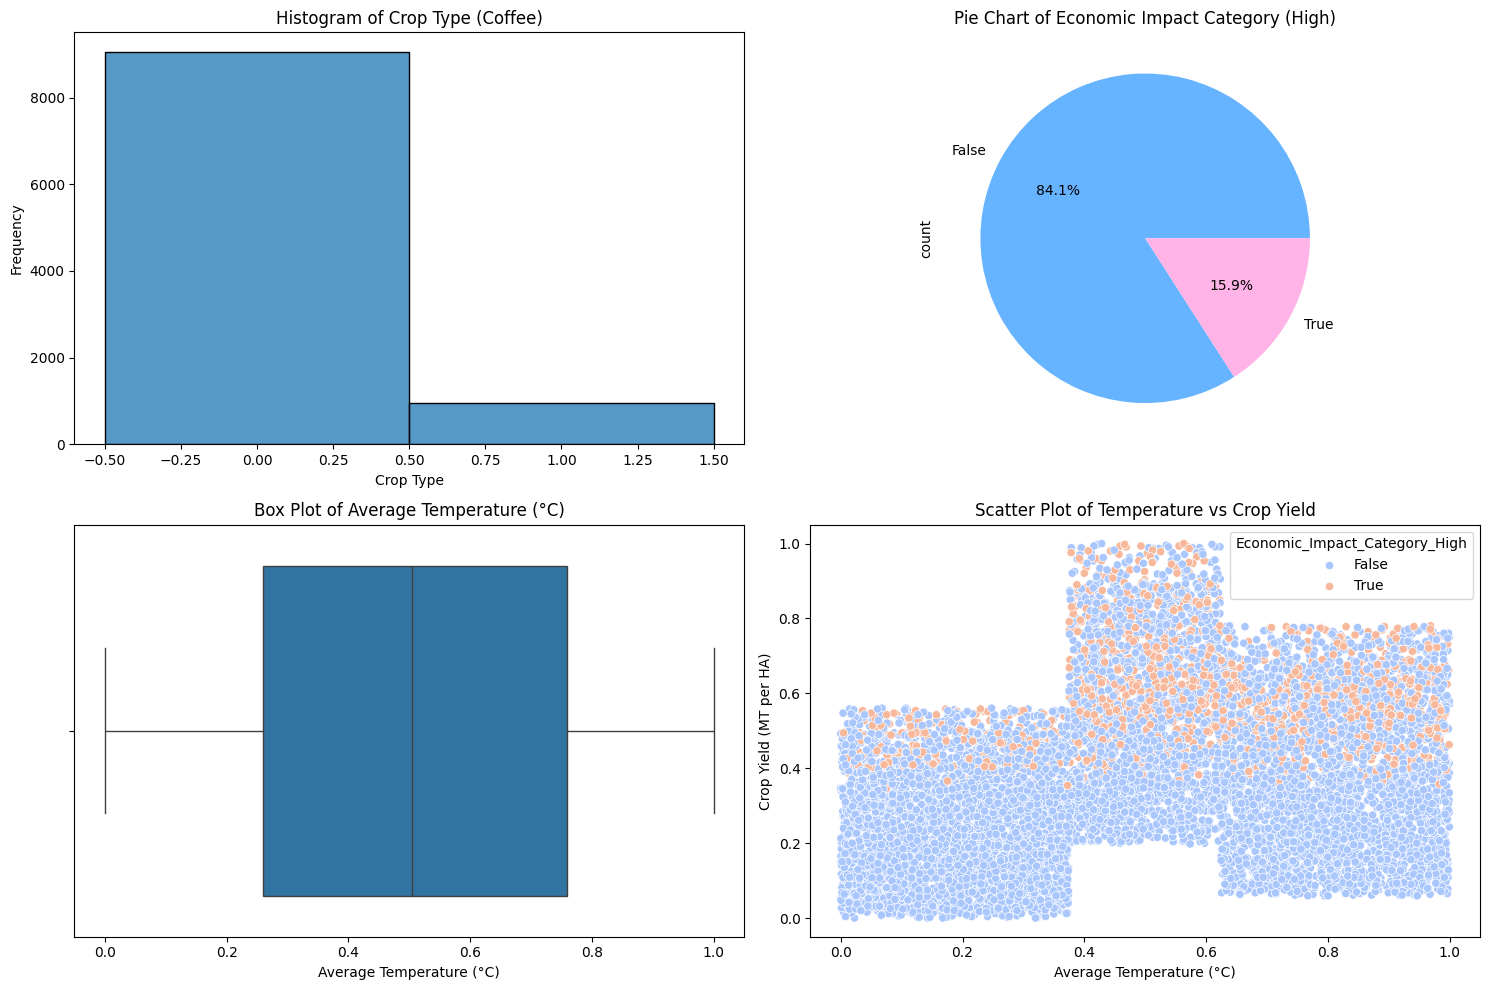

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Postavljanje subgrafova
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# 1. Histogram kategorijske varijable (npr. 'Crop_Type_Coffee')
sns.histplot(data['Crop_Type_Coffee'], ax=axs[0, 0], discrete=True)  # Zamijeniti 'Crop_Type_Coffee' s bilo kojom varijablom vrste usjeva
axs[0, 0].set_title("Histogram vrste usjeva (Kava)")
axs[0, 0].set_xlabel("Vrsta usjeva")
axs[0, 0].set_ylabel("Frekvencija")

# 2. Kružni graf ciljne varijable (npr. 'Economic_Impact_Category_High')
data['Economic_Impact_Category_High'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[0, 1], colors=['#66b3ff', '#ffb3e6'])
axs[0, 1].set_title("Kružni graf kategorije ekonomski utjecaj (Visoko)")

# 3. Kutijasti graf numeričke varijable (npr. 'Average_Temperature_C')
sns.boxplot(x=data['Average_Temperature_C'], ax=axs[1, 0])  # Zamijeniti s bilo kojom numeričkom varijablom
axs[1, 0].set_title("Kutijasti graf prosječne temperature (°C)")
axs[1, 0].set_xlabel("Prosječna temperatura (°C)")

# 4. Raspršeni graf između dvije numeričke varijable (npr. 'Average_Temperature_C' i 'Crop_Yield_MT_per_HA')
sns.scatterplot(x=data['Average_Temperature_C'], y=data['Crop_Yield_MT_per_HA'], hue=data['Economic_Impact_Category_High'], ax=axs[1, 1], palette='coolwarm')
axs[1, 1].set_title("Raspršeni graf temperature vs prinos usjeva")
axs[1, 1].set_xlabel("Prosječna temperatura (°C)")
axs[1, 1].set_ylabel("Prinos usjeva (MT po HA)")

# Prilagodba rasporeda kako bi se izbjeglo preklapanje
plt.tight_layout()

# Prikazivanje grafa
plt.show()
